# INSTRUCTIONS PROVIDED:

## PRODUCTION:
Dataset containing PLC information on the processing settings at COIL-DATE-MT level.
1. `COIL ID`: of the metal coil processed
1. `MT`:meter observation of the coil (i.e. one observation every 7 meters)
1. `DATE`: day of the year in which the processing of a given COIL-MT started
1. `TIME_START_PROCESS`: time in which the processing started 
1. All the remaining fields are settings refering to the processing of a given COIL-MT.

Hint: check the reliability of the MT variable.

## DEFECTS:
Dataset containing information on the detected defect by coil and type of defect.

This information are gathered during quality control processes after the production.
1. `COIL ID`: of the metal coil processed
1. `MT_FROM`: point of the coil in which a given defect start.
1. `MT_TO`: point in which a given defect end.
1. `DATE`: date in which the coil has been processed.
1. `DIF_TIPO_1`(to6): indicator for the kind of of defect detected.

In [1]:
#imports here
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading data
path_production= '/Users/mattia/Library/CloudStorage/OneDrive-Personal/BBS/05 Machine learnign/00 Fieldwork/4_MANUFACTURING_ROOT CAUSE/RC_PRODUCTION_clean.csv'
path_defects='/Users/mattia/Library/CloudStorage/OneDrive-Personal/BBS/05 Machine learnign/00 Fieldwork/4_MANUFACTURING_ROOT CAUSE/RC_DEFECTS_clean.csv'
production = pd.read_csv(path_production)
defects = pd.read_csv(path_defects)

In [3]:
#Data observation
production.head(100
                )




,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,240627,2019-03-15,0.0,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,7.0,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14.0,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,21.0,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,28.0,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,...,530.110125,14.625,14.625,1956.40875,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,240627,2019-05-14,672.0,02:18:00.520,50.513325,1117.783125,1154.602500,1161.551250,1174.350000,1171.293750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,240627,2019-05-14,679.0,02:18:15.520,50.534258,1113.120225,1151.986500,1160.568000,1176.945750,1175.103000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,240627,2019-05-14,686.0,02:18:30.520,50.539388,1108.333432,1148.897045,1159.552841,1178.450795,1178.096932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,240627,2019-05-14,693.0,02:18:30.520,50.537025,1103.492455,1145.603864,1157.927727,1178.307614,1179.965455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
defects.head()


,COIL,MT_FROM,MT_TO,DATE,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,389523,0.0,599.0,2019-03-01,0,0,1,0,0,0
1,389523,600.0,1457.0,2019-03-01,0,1,1,0,0,0
2,389528,0.0,1399.0,2019-03-01,0,0,1,0,0,0
3,389528,1400.0,1539.0,2019-03-01,0,0,1,0,1,0
4,389712,0.0,1374.0,2019-03-01,0,0,1,0,0,0


In [5]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299384 entries, 0 to 299383
Columns: 110 entries, COIL to FILL_BENDING_NEG
dtypes: float64(107), int64(1), object(2)
memory usage: 251.3+ MB


In [6]:
defects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COIL        617 non-null    int64  
 1   MT_FROM     617 non-null    float64
 2   MT_TO       617 non-null    float64
 3   DATE        617 non-null    object 
 4   DIF_TIPO_1  617 non-null    int64  
 5   DIF_TIPO_2  617 non-null    int64  
 6   DIF_TIPO_3  617 non-null    int64  
 7   DIF_TIPO_4  617 non-null    int64  
 8   DIF_TIPO_5  617 non-null    int64  
 9   DIF_TIPO_6  617 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 48.3+ KB


In [7]:
production['COIL'].nunique()
defects['COIL'].nunique()
#Data observation
merged_df = pd.merge(production, defects, on='COIL')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132015 entries, 0 to 132014
Columns: 119 entries, COIL to DIF_TIPO_6
dtypes: float64(109), int64(7), object(3)
memory usage: 119.9+ MB


Number of missing values in MT: 0
Number of duplicate values in MT: 298344


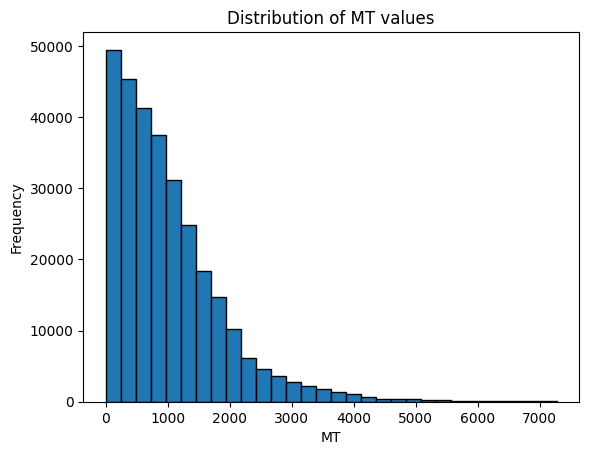

In [8]:
# Assuming df is your DataFrame and "MT" is the column you want to check
mt_values = production["MT"]

# Check for missing values
print(f"Number of missing values in MT: {mt_values.isna().sum()}")

# Check for duplicates
print(f"Number of duplicate values in MT: {mt_values.duplicated().sum()}")

# Check the distribution
plt.hist(mt_values.dropna(), bins=30, edgecolor='black')
plt.title("Distribution of MT values")
plt.xlabel("MT")
plt.ylabel("Frequency")
plt.show()

In [9]:
def check_multiple_of_seven(series):
    return all(value % 7 == 0 for value in series)

# Replace "column_name" with the name of your column
is_multiple_of_seven = check_multiple_of_seven(production["MT"])

print(f"All values in the column are multiples of 7: {is_multiple_of_seven}")


All values in the column are multiples of 7: True


In [17]:
# Convert MT_FROM and MT_TO to integers, handling NaN and float values
defects['MT_FROM'] = defects['MT_FROM'].fillna(0).astype(int)
defects['MT_TO'] = defects['MT_TO'].fillna(0).astype(int)

# Create a new column in defects to facilitate the merge
defects['MT'] = defects.apply(lambda x: list(range(x['MT_FROM'], x['MT_TO']+1)), axis=1)

# Explode the 'MT' column to create a row for each meter within the defect range
defects_exploded = defects.explode('MT')

# Perform the merge on 'COIL' and 'MT'
merged_df = pd.merge(production, defects_exploded, on=['COIL', 'MT'], how='left', suffixes=('', '_defects'))

# Now, we need to fill in the defect information for the rows where the defects are present
# We will create a mask that identifies rows where a defect starts and propagate the defect information forward
for col in ['DATE', 'DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']:
    # Forward-fill the defect information for each COIL group
    merged_df[col] = merged_df.groupby('COIL')[col].ffill()

# Filter out the rows where 'MT' is less than 'MT_FROM' and greater than 'MT_TO'
merged_df = merged_df[(merged_df['MT'] >= merged_df['MT_FROM']) & (merged_df['MT'] <= merged_df['MT_TO'])]

# Now merged_df should have the defect information and date in the correct rows



(107447, 119)

In [18]:
merged_df.shape
merged_df.head()

,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,FILL_BENDING_NEG,MT_FROM,MT_TO,DATE_defects,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
4366,367736,2019-04-14,0.0,21:19:53.790,23.566950,1253.67750,1281.43125,1288.5525,1305.42750,1322.39250,...,NaN,0.0,719.0,2019-04-14,0.0,0.0,1.0,0.0,0.0,0.0
4367,367736,2019-04-14,7.0,21:20:23.790,23.565262,1253.98125,1281.36375,1289.7675,1305.68625,1322.82000,...,0.242885,0.0,719.0,2019-04-14,0.0,0.0,1.0,0.0,0.0,0.0
4368,367736,2019-04-14,14.0,21:20:38.790,23.570363,1254.04125,1281.41625,1289.9025,1305.39000,1322.37000,...,0.242953,0.0,719.0,2019-04-14,0.0,0.0,1.0,0.0,0.0,0.0
4369,367736,2019-04-14,21.0,21:20:53.790,23.545215,1254.13200,1281.14775,1289.3310,1305.29475,1322.23725,...,0.242980,0.0,719.0,2019-04-14,0.0,0.0,1.0,0.0,0.0,0.0
4370,367736,2019-04-14,28.0,21:21:23.790,23.549850,1254.47625,1281.17250,1289.6100,1305.48375,1321.99875,...,0.242981,0.0,719.0,2019-04-14,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
merged_df.to_csv('merged_data.csv', index=False)